In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Dataset/emails.csv")

In [3]:
df.shape

(5172, 3002)

In [4]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [5]:
x = df.drop(['Email No.','Prediction'], axis=1)
y=df['Prediction']

In [6]:
x.shape

(5172, 3000)

In [7]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3000 entries, the to dry
dtypes: int64(3000)
memory usage: 118.4 MB


In [8]:
x.dtypes

the               int64
to                int64
ect               int64
and               int64
for               int64
                  ...  
infrastructure    int64
military          int64
allowing          int64
ff                int64
dry               int64
Length: 3000, dtype: object

In [9]:
set(x.dtypes)

{dtype('int64')}

<AxesSubplot:xlabel='Prediction', ylabel='count'>

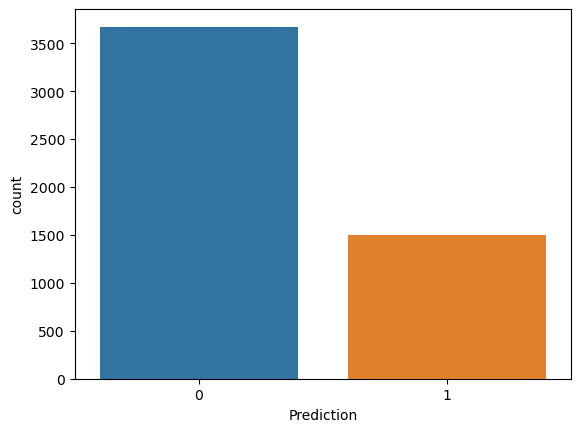

In [11]:
import seaborn as sns
sns.countplot(x=y)

In [12]:
y.value_counts()

0    3672
1    1500
Name: Prediction, dtype: int64

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [15]:
x_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03809524, 0.09848485, 0.06705539, ..., 0.        , 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00952381, 0.0530303 , 0.        , ..., 0.        , 0.00877193,
        0.        ],
       [0.1047619 , 0.18181818, 0.01166181, ..., 0.        , 0.        ,
        0.        ]])

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,random_state=0,test_size=0.25)

In [18]:
x_scaled.shape

(5172, 3000)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)

In [21]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [22]:
y_pred= knn.predict(x_test)

C:\Users\rushi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [25]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score

In [26]:
from sklearn.metrics import classification_report

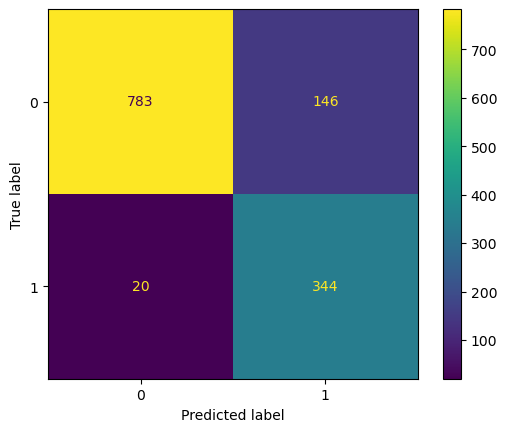

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [29]:
y_test.value_counts()

0    929
1    364
Name: Prediction, dtype: int64

In [30]:
accuracy_score(y_test,y_pred)

0.871616395978345

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90       929
           1       0.70      0.95      0.81       364

    accuracy                           0.87      1293
   macro avg       0.84      0.89      0.85      1293
weighted avg       0.90      0.87      0.88      1293



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

error = []

for k in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    error.append(np.mean(pred != y_test))


In [36]:
error

[0.10827532869296211,
 0.10982211910286156,
 0.12296983758700696,
 0.11523588553750967,
 0.12838360402165508,
 0.1214230471771075,
 0.15158546017014696,
 0.14849187935034802,
 0.17246713070378963,
 0.16705336426914152,
 0.1871616395978345,
 0.18329466357308585,
 0.21500386697602475,
 0.21345707656612528,
 0.22815158546017014,
 0.2266047950502707,
 0.23588553750966745,
 0.23356535189481825,
 0.2459396751740139,
 0.24361948955916474,
 0.2559938128383604,
 0.2552204176334107,
 0.2699149265274555,
 0.2691415313225058,
 0.2822892498066512,
 0.28306264501160094,
 0.2954369682907966,
 0.2923433874709977,
 0.3039443155452436,
 0.300077339520495,
 0.30549110595514306,
 0.30549110595514306,
 0.31245166279969067,
 0.31245166279969067,
 0.3194122196442382,
 0.317092034029389,
 0.32637277648878577,
 0.32559938128383603,
 0.33410672853828305,
 0.3325599381283836]

In [37]:
knn = KNeighborsClassifier (n_neighbors=1)

In [38]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [39]:
y_pred = knn.predict(x_test)

C:\Users\rushi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [40]:
accuracy_score (y_test, y_pred)

0.8917246713070379

In [41]:
from sklearn.svm import SVC

In [43]:
svm = SVC (kernel ='linear')

In [44]:
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [45]:
y_pred = svm.predict(x_test)

In [46]:
accuracy_score (y_test, y_pred)

0.9767981438515081